<a href="https://colab.research.google.com/github/gashawmg/molecular-descriptors/blob/main/Molecular%20descriptors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Part 2: Calculating molecular descriptors using RDkit and Mordred

In [ ]:
!pip install rdkit-pypi
!pip install mordred

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.4 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176721 sha256=bda02d8279bd2e84a1625bcc116d09a2855b8309988a95a626bd415afb7275ed
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1


In [ ]:
# https://www.rdkit.org/
#https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred
from mordred import Calculator, descriptors

In [ ]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,359.473,3.88312,2.0,3.0
1,330.435,3.26410,1.0,3.0
2,330.435,3.26410,1.0,3.0
3,330.435,3.26410,1.0,3.0
4,359.473,3.58510,1.0,4.0
...,...,...,...,...
92,440.305,1.34230,2.0,6.0
93,408.263,1.46820,2.0,5.0
94,422.290,1.85830,2.0,5.0
95,432.260,2.62850,2.0,4.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL419399,Cc1ccc(CC2CCN(CC#Cc3ccc4[nH]c(O)nc4c3)CC2)cc1,active,17.0
1,CHEMBL115761,C(#Cc1ccc2[nH]nnc2c1)CN1CCC(Cc2ccccc2)CC1,inactive,100000.0
2,CHEMBL115761,C(#Cc1ccc2[nH]nnc2c1)CN1CCC(Cc2ccccc2)CC1,active,420.0
3,CHEMBL115761,C(#Cc1ccc2[nH]nnc2c1)CN1CCC(Cc2ccccc2)CC1,inactive,100000.0
4,CHEMBL114155,Cn1c(O)nc2cc(C#CCN3CCC(Cc4ccccc4)CC3)ccc21,inactive,89000.0
...,...,...,...,...
92,CHEMBL399274,CCOCCOCCN(c1c(Cl)c(Cl)cc2[nH]c(=O)c(=O)[nH]c12...,active,166.0
93,CHEMBL248438,CS(=O)(=O)N(CC1CCCO1)c1c(Cl)c(Cl)cc2[nH]c(=O)c...,active,59.0
94,CHEMBL399075,CS(=O)(=O)N(CC1CCCCO1)c1c(Cl)c(Cl)cc2[nH]c(=O)...,active,39.0
95,CHEMBL248436,CS(=O)(=O)N(Cc1cccc(F)c1)c1c(Cl)c(Cl)cc2[nH]c(...,active,45.0


In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL419399,Cc1ccc(CC2CCN(CC#Cc3ccc4[nH]c(O)nc4c3)CC2)cc1,active,17.0,359.473,3.88312,2.0,3.0
1,CHEMBL115761,C(#Cc1ccc2[nH]nnc2c1)CN1CCC(Cc2ccccc2)CC1,inactive,100000.0,330.435,3.26410,1.0,3.0
2,CHEMBL115761,C(#Cc1ccc2[nH]nnc2c1)CN1CCC(Cc2ccccc2)CC1,active,420.0,330.435,3.26410,1.0,3.0
3,CHEMBL115761,C(#Cc1ccc2[nH]nnc2c1)CN1CCC(Cc2ccccc2)CC1,inactive,100000.0,330.435,3.26410,1.0,3.0
4,CHEMBL114155,Cn1c(O)nc2cc(C#CCN3CCC(Cc4ccccc4)CC3)ccc21,inactive,89000.0,359.473,3.58510,1.0,4.0
...,...,...,...,...,...,...,...,...
92,CHEMBL399274,CCOCCOCCN(c1c(Cl)c(Cl)cc2[nH]c(=O)c(=O)[nH]c12...,active,166.0,440.305,1.34230,2.0,6.0
93,CHEMBL248438,CS(=O)(=O)N(CC1CCCO1)c1c(Cl)c(Cl)cc2[nH]c(=O)c...,active,59.0,408.263,1.46820,2.0,5.0
94,CHEMBL399075,CS(=O)(=O)N(CC1CCCCO1)c1c(Cl)c(Cl)cc2[nH]c(=O)...,active,39.0,422.290,1.85830,2.0,5.0
95,CHEMBL248436,CS(=O)(=O)N(Cc1cccc(F)c1)c1c(Cl)c(Cl)cc2[nH]c(...,active,45.0,432.260,2.62850,2.0,4.0


In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

In [ ]:
df_combined.standard_value.describe()

count        97.000000
mean      35345.428866
std       45386.391062
min           1.000000
25%          22.000000
50%         220.000000
75%      100000.000000
max      100000.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-19-5b44499df3ba>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL419399,Cc1ccc(CC2CCN(CC#Cc3ccc4[nH]c(O)nc4c3)CC2)cc1,active,359.473,3.88312,2.0,3.0,17.0
1,CHEMBL115761,C(#Cc1ccc2[nH]nnc2c1)CN1CCC(Cc2ccccc2)CC1,inactive,330.435,3.26410,1.0,3.0,100000.0
2,CHEMBL115761,C(#Cc1ccc2[nH]nnc2c1)CN1CCC(Cc2ccccc2)CC1,active,330.435,3.26410,1.0,3.0,420.0
3,CHEMBL115761,C(#Cc1ccc2[nH]nnc2c1)CN1CCC(Cc2ccccc2)CC1,inactive,330.435,3.26410,1.0,3.0,100000.0
4,CHEMBL114155,Cn1c(O)nc2cc(C#CCN3CCC(Cc4ccccc4)CC3)ccc21,inactive,359.473,3.58510,1.0,4.0,89000.0
...,...,...,...,...,...,...,...,...
92,CHEMBL399274,CCOCCOCCN(c1c(Cl)c(Cl)cc2[nH]c(=O)c(=O)[nH]c12...,active,440.305,1.34230,2.0,6.0,166.0
93,CHEMBL248438,CS(=O)(=O)N(CC1CCCO1)c1c(Cl)c(Cl)cc2[nH]c(=O)c...,active,408.263,1.46820,2.0,5.0,59.0
94,CHEMBL399075,CS(=O)(=O)N(CC1CCCCO1)c1c(Cl)c(Cl)cc2[nH]c(=O)...,active,422.290,1.85830,2.0,5.0,39.0
95,CHEMBL248436,CS(=O)(=O)N(Cc1cccc(F)c1)c1c(Cl)c(Cl)cc2[nH]c(...,active,432.260,2.62850,2.0,4.0,45.0


In [ ]:
df_norm.standard_value_norm.describe()

count        97.000000
mean      35345.428866
std       45386.391062
min           1.000000
25%          22.000000
50%         220.000000
75%      100000.000000
max      100000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

<ipython-input-15-715877a2f74e>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL419399,Cc1ccc(CC2CCN(CC#Cc3ccc4[nH]c(O)nc4c3)CC2)cc1,active,359.473,3.88312,2.0,3.0,7.769551
1,CHEMBL115761,C(#Cc1ccc2[nH]nnc2c1)CN1CCC(Cc2ccccc2)CC1,inactive,330.435,3.26410,1.0,3.0,4.000000
2,CHEMBL115761,C(#Cc1ccc2[nH]nnc2c1)CN1CCC(Cc2ccccc2)CC1,active,330.435,3.26410,1.0,3.0,6.376751
3,CHEMBL115761,C(#Cc1ccc2[nH]nnc2c1)CN1CCC(Cc2ccccc2)CC1,inactive,330.435,3.26410,1.0,3.0,4.000000
4,CHEMBL114155,Cn1c(O)nc2cc(C#CCN3CCC(Cc4ccccc4)CC3)ccc21,inactive,359.473,3.58510,1.0,4.0,4.050610
...,...,...,...,...,...,...,...,...
92,CHEMBL399274,CCOCCOCCN(c1c(Cl)c(Cl)cc2[nH]c(=O)c(=O)[nH]c12...,active,440.305,1.34230,2.0,6.0,6.779892
93,CHEMBL248438,CS(=O)(=O)N(CC1CCCO1)c1c(Cl)c(Cl)cc2[nH]c(=O)c...,active,408.263,1.46820,2.0,5.0,7.229148
94,CHEMBL399075,CS(=O)(=O)N(CC1CCCCO1)c1c(Cl)c(Cl)cc2[nH]c(=O)...,active,422.290,1.85830,2.0,5.0,7.408935
95,CHEMBL248436,CS(=O)(=O)N(Cc1cccc(F)c1)c1c(Cl)c(Cl)cc2[nH]c(...,active,432.260,2.62850,2.0,4.0,7.346787


In [ ]:
df_final.pIC50.describe()

count    97.000000
mean      6.067699
std       1.745493
min       4.000000
25%       4.000000
50%       6.657577
75%       7.657577
max       9.000000
Name: pIC50, dtype: float64

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL419399,Cc1ccc(CC2CCN(CC#Cc3ccc4[nH]c(O)nc4c3)CC2)cc1,active,359.473,3.88312,2.0,3.0,7.769551
1,CHEMBL115761,C(#Cc1ccc2[nH]nnc2c1)CN1CCC(Cc2ccccc2)CC1,inactive,330.435,3.26410,1.0,3.0,4.000000
2,CHEMBL115761,C(#Cc1ccc2[nH]nnc2c1)CN1CCC(Cc2ccccc2)CC1,active,330.435,3.26410,1.0,3.0,6.376751
3,CHEMBL115761,C(#Cc1ccc2[nH]nnc2c1)CN1CCC(Cc2ccccc2)CC1,inactive,330.435,3.26410,1.0,3.0,4.000000
4,CHEMBL114155,Cn1c(O)nc2cc(C#CCN3CCC(Cc4ccccc4)CC3)ccc21,inactive,359.473,3.58510,1.0,4.0,4.050610
...,...,...,...,...,...,...,...,...
92,CHEMBL399274,CCOCCOCCN(c1c(Cl)c(Cl)cc2[nH]c(=O)c(=O)[nH]c12...,active,440.305,1.34230,2.0,6.0,6.779892
93,CHEMBL248438,CS(=O)(=O)N(CC1CCCO1)c1c(Cl)c(Cl)cc2[nH]c(=O)c...,active,408.263,1.46820,2.0,5.0,7.229148
94,CHEMBL399075,CS(=O)(=O)N(CC1CCCCO1)c1c(Cl)c(Cl)cc2[nH]c(=O)...,active,422.290,1.85830,2.0,5.0,7.408935
95,CHEMBL248436,CS(=O)(=O)N(Cc1cccc(F)c1)c1c(Cl)c(Cl)cc2[nH]c(...,active,432.260,2.62850,2.0,4.0,7.346787


In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

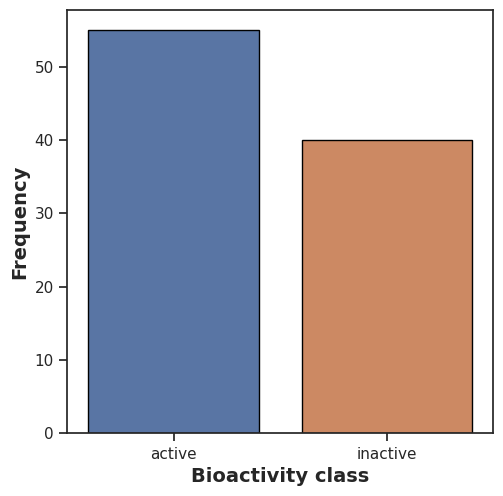

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

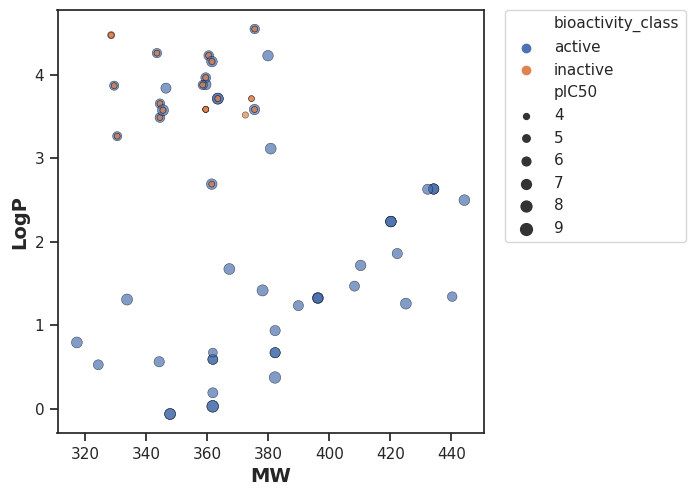

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

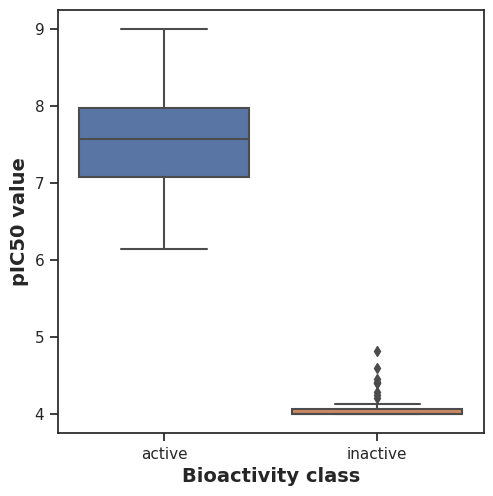

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,2200.0,4.612487e-17,0.05,Different distribution (reject H0)


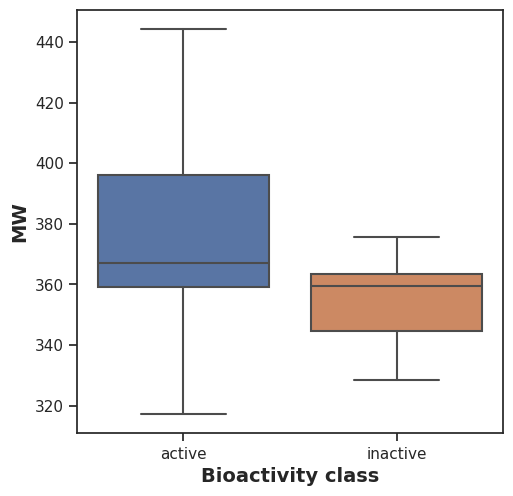

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1597.0,0.000181,0.05,Different distribution (reject H0)


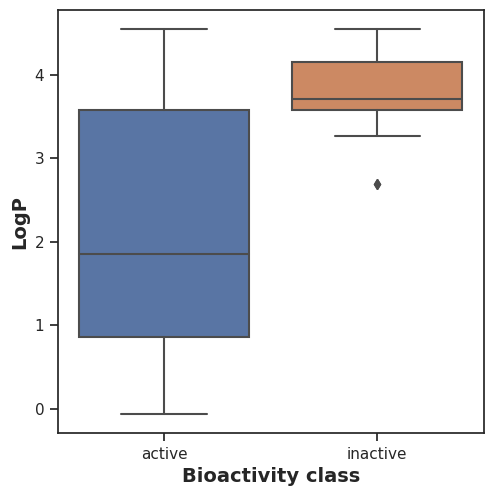

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,377.0,5.083748e-08,0.05,Different distribution (reject H0)


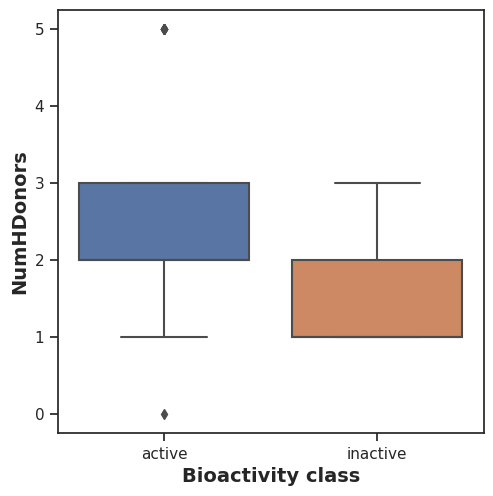

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1657.0,0.000006,0.05,Different distribution (reject H0)


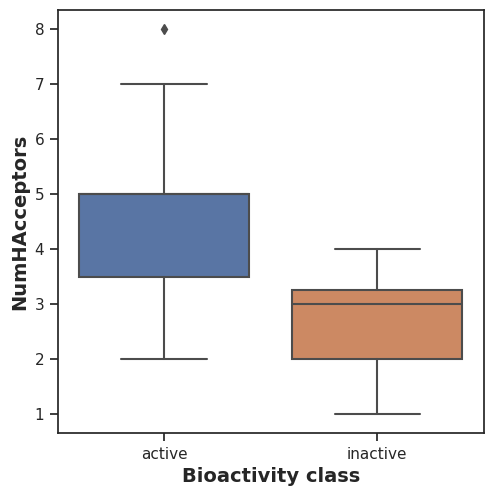

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1818.0,2.768921e-08,0.05,Different distribution (reject H0)


In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: mannwhitneyu_MW.csv (deflated 10%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: bioactivity_data_preprocessed.csv (deflated 86%)
  adding: plot_MW_vs_LogP.pdf (deflated 17%)
